# Unit testing

In [1]:
!pwd

/Users/barak 1/MyDrive/Projects/PereIon_NPC_FLIP/git_npctransport_kinetic


In [2]:
!python test_transport_simulation.py

Registering <function TransportSimulation.get_free_N_to_free_C at 0x7f88081a91e0>
Registering <function TransportSimulation.get_nmol_GDP_C_to_GDP_N at 0x7f88081a6f28>
Registering <function TransportSimulation.get_nmol_GDP_N_to_GTP_N at 0x7f88081a6d90>
Registering <function TransportSimulation.get_nmol_GTP_C_to_GDP_C at 0x7f88081a6e18>
Registering <function TransportSimulation.get_nmol_GTP_N_to_GTP_C at 0x7f88081a6ea0>
Registering <function TransportSimulation.get_nmol_cargo_bleached at 0x7f88081a9400>
Registering <function TransportSimulation.get_nmol_complex_C_to_free_C at 0x7f88081a9048>
Registering <function TransportSimulation.get_nmol_complex_NPC_to_complex_N_C at 0x7f88081a9378>
Registering <function TransportSimulation.get_nmol_complex_NPC_to_free_N at 0x7f88081a6c80>
Registering <function TransportSimulation.get_nmol_complex_NPC_traverse at 0x7f88081a92f0>
Registering <function TransportSimulation.get_nmol_complex_N_C_to_complex_NPC at 0x7f88081a9268>
Registering <function Tran

# Model variables - legend:

complexL/U - importin-cargo complex, labeled (L) or unlabeled (U) 

freeL/U - free cargo, labeled (L) or unlabeled (U) 

c - concentration

v - volume

C - cytoplasm

N - nucleues

NPC - nuclear pore complex

nmol - number of molecules

M - molar (moles per liter)

L - liter

fL - femtoliter


In [1]:
import importlib
import transport_simulation
from transport_simulation import TransportSimulation
importlib.reload(transport_simulation)
import transport_simulation
from transport_simulation import TransportSimulation


Registering <function TransportSimulation.get_free_N_to_free_C at 0x7f945071cd90>
Registering <function TransportSimulation.get_nmol_GDP_C_to_GDP_N at 0x7f945071cb70>
Registering <function TransportSimulation.get_nmol_GDP_N_to_GTP_N at 0x7f945071c9d8>
Registering <function TransportSimulation.get_nmol_GTP_C_to_GDP_C at 0x7f945071ca60>
Registering <function TransportSimulation.get_nmol_GTP_N_to_GTP_C at 0x7f945071cae8>
Registering <function TransportSimulation.get_nmol_cargo_bleached at 0x7f945071d048>
Registering <function TransportSimulation.get_nmol_complex_C_to_free_C at 0x7f945071cbf8>
Registering <function TransportSimulation.get_nmol_complex_NPC_to_complex_N_C at 0x7f945071cf28>
Registering <function TransportSimulation.get_nmol_complex_NPC_to_free_N at 0x7f945071c8c8>
Registering <function TransportSimulation.get_nmol_complex_NPC_traverse at 0x7f945071cea0>
Registering <function TransportSimulation.get_nmol_complex_N_C_to_complex_NPC at 0x7f945071ce18>
Registering <function Tran

# Simulation main code

In [2]:
from matplotlib import pyplot as plt
import numpy as np


def plot_simulation_attributes(stats, 
                               attributes_list, 
                               log=True):
  def merge_lists(lists):
      return [x for y in lists for x in y]
  attributes= merge_lists(attributes_list)
  assert(len(attributes) == sum([len(x) for x in attributes_list]))
  fig, axes= plt.subplots(len(attributes_list),
                          1, 
                          figsize=(10,15), 
                          squeeze= False)
  x= stats['time_sec']
  for cur_attributes, ax in zip(attributes_list, axes[:,0]):
      print(cur_attributes)
      for attr in cur_attributes:
        ax.plot(x, stats[attr], label=attr)
      if log:
        ax.set_yscale('log')
      ax.set_xlabel("time [sec]")
      ax.set_ylabel("nmol")
      ax.legend()
      if is_log:
        ylim= ax.get_ylim()
        ylim= (10.0, ylim[1])
        ax.set_ylim(ylim)
  return axes


In [400]:
# 
def get_ts_time_series(dt_sec, **kwargs):
  ts= TransportSimulation(v_N_L=627e-15,
                          v_C_L=2194e-15,
                          **kwargs)
  ts.bleach_start_time_sec= 400.0
  ts.dt_sec= dt_sec
  ts.set_NPC_dock_sites(n_NPCs= 2000, 
                        n_dock_sites_per_NPC= 500)
  ts.set_passive_nuclear_molar_rate_per_sec(0.02)
  ts.set_params(fraction_complex_NPC_traverse_per_sec= 100,
              rate_free_to_complex_per_sec= 0.05)
  ts.bleach_volume_L_per_sec= 100.0e-15
  #ts.rate_complex_to_NPC_per_free_site_per_sec_per_M= 1.0e+6
  ts.fraction_complex_NPC_to_free_N_per_M_GTP_per_sec = 0.05e+6 # TODO: this is doubled relative to complex_N to free_N
  ts.fraction_complex_N_to_free_N_per_M_GTP_per_sec = 0.05e+6
  return ts

def get_ts_time_series_2(passive_nuclear_molar_rate_per_sec,
                                        is_force,
                            **kwargs):
    if is_force:
        v_N_L=762e-15
        v_C_L=4768e-15
    else:
        v_N_L=627e-15
        v_C_L=2194e-15           
    ts= transport_simulation.TransportSimulation(v_N_L= v_N_L,
                                                v_C_L= v_C_L)      
    ts.set_time_step(1.0e-3)
    ts.set_NPC_dock_sites(n_NPCs= 2000, 
                        n_dock_sites_per_NPC= 500)
    ts.set_passive_nuclear_molar_rate_per_sec(passive_nuclear_molar_rate_per_sec) #get_passive_export_rate_per_sec(27,1))
    ts.fraction_complex_NPC_to_free_N_per_M_GTP_per_sec = 10.0e+6 # TODO: this is doubled relative to complex_N to free_N
    ts.fraction_complex_N_to_free_N_per_M_GTP_per_sec = 10.0e+6
    ts.rate_complex_to_NPC_per_free_site_per_sec_per_M= 50.0e+6
    ts.fraction_complex_NPC_to_complex_N_C_per_sec= 25.0 # Leakage parameter
    ts.rate_GDP_N_to_GTP_N_per_sec= 200.0
    ts.rate_GTP_N_to_GDP_N_per_sec= 2.0
    ts.rate_GTP_C_to_GDP_C_per_sec= 500.0
    ts.rate_GTP_N_to_GTP_C_per_sec = 25.0
    ts.rate_GDP_C_to_GDP_N_per_sec = 3.0
    ts.rate_GDP_N_to_GDP_C_per_sec = 3.0
    ts.rate_complex_to_free_per_sec = 0.05
    ts.rate_free_to_complex_per_sec = 0.05
    ts.fraction_complex_NPC_traverse_per_sec=200
    ts.set_params(**kwargs) # override defaults
    return ts

def get_ts_time_series_3(passive_nuclear_molar_rate_per_sec,
                                        is_force,
                         dt_sec=0.3e-3,
                            **kwargs):
    if is_force:
        v_N_L=762e-15
        v_C_L=4768e-15
    else:
        v_N_L=627e-15
        v_C_L=2194e-15    
    ts= transport_simulation.TransportSimulation(v_N_L= v_N_L,
                                                v_C_L= v_C_L)      
    ts.set_time_step(dt_sec)
    ts.set_NPC_dock_sites(n_NPCs= 2000, 
                        n_dock_sites_per_NPC= 500)
    ts.set_passive_nuclear_molar_rate_per_sec(passive_nuclear_molar_rate_per_sec) #get_passive_export_rate_per_sec(27,1))
    ts.fraction_complex_NPC_to_free_N_per_M_GTP_per_sec = 1.0e+6 # TODO: this is doubled relative to complex_N to free_N
    ts.fraction_complex_N_to_free_N_per_M_GTP_per_sec = 1.0e+6
    ts.rate_complex_to_NPC_per_free_site_per_sec_per_M= 50e+6
    ts.fraction_complex_NPC_to_complex_N_C_per_sec= 1000.0 # Leakage parameter
    ts.rate_GDP_N_to_GTP_N_per_sec= 1000.0
    ts.rate_GTP_N_to_GDP_N_per_sec= 0.2
    ts.rate_GTP_C_to_GDP_C_per_sec= 500.0
    ts.rate_GTP_N_to_GTP_C_per_sec = 0.5
    ts.rate_GDP_C_to_GDP_N_per_sec = 1.0
    ts.rate_GDP_N_to_GDP_C_per_sec = 1.0 
    ts.rate_complex_to_free_per_sec = 0.05
    ts.rate_free_to_complex_per_sec = 0.01
    ts.fraction_complex_NPC_traverse_per_sec=4000
    ts.set_params(**kwargs) # override defaults
    return ts

In [401]:
# RUN:
sim_time_sec= 50.0
sim_flags= dict()#rate_free_to_complex_per_sec=1.0,
                #max_passive_diffusion_rate_nmol_per_sec_per_M=2e7)
#ts= get_ts_time_series(dt_sec= 2e-3, **sim_flags)
ts= get_ts_time_series_3(passive_nuclear_molar_rate_per_sec=0.04,
                         is_force= False,
                         **sim_flags)
stats= ts.simulate(sim_time_sec, nskip_statistics= 10)

['GDP_N', 'GDP_C', 'GTP_N', 'GTP_C']
['complexL_NPC_C_import', 'complexL_NPC_C_export', 'complexL_NPC_N_import', 'complexL_NPC_N_export', 'freeL_N', 'freeL_C', 'complexL_C', 'complexL_N']
['complexU_NPC_C_import', 'complexU_NPC_C_export', 'complexU_NPC_N_import', 'complexU_NPC_N_export', 'freeU_N', 'freeU_C', 'complexU_C', 'complexU_N']


/Users/Admin/Public/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Data has no positive values, and therefore cannot be log-scaled.


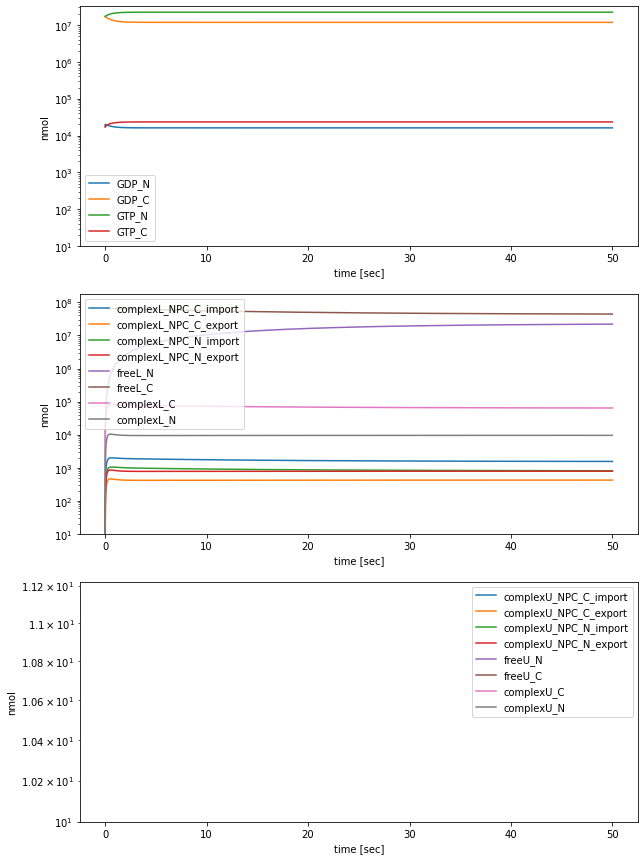

In [402]:
#### 
RAN_attributes = ['GDP_N', 'GDP_C', 'GTP_N', 'GTP_C']
cargoL_attributes= ['complexL_NPC_C_import', 'complexL_NPC_C_export',
                    'complexL_NPC_N_import', 'complexL_NPC_N_export',
                    'freeL_N', 'freeL_C', 'complexL_C', 'complexL_N']
cargoU_attributes= ['complexU_NPC_C_import', 'complexU_NPC_C_export', 
                    'complexU_NPC_N_import', 'complexU_NPC_N_export',
                    'freeU_N', 'freeU_C', 'complexU_C', 'complexU_N']
c_attributes = ["c_C_M", "c_C_M"]
b_attributes = ['fraction_C_b', "c_C_M", ]
npc_attributes = ['nmol_NPC']
dock_attributes = ['c_C_M', 'fraction_C_b', 'nmol_NPC', 'NPC_dock_capacity']
is_log= True
ax= plot_simulation_attributes(
    stats, 
    [ RAN_attributes, 
     cargoL_attributes, 
     cargoU_attributes ],
    log= is_log)

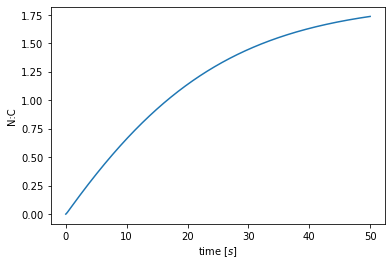

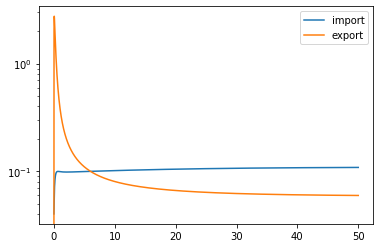

In [403]:
## plt.figure()
plt.plot(stats['time_sec'], 
         (stats['freeL_N']+stats['complexL_N']+stats['freeU_N']+stats['complexU_N']) 
         / (stats['freeL_C']+stats['complexL_C']+stats['freeU_C']+stats['complexU_C']) * (ts.get_v_C_L()/ts.get_v_N_L()))
plt.xlabel(r'time [$s$]')
plt.ylabel(r'N:C')
#plt.ylim(0,5)
plt.figure()
for tag in ['import','export']:
    plt.plot(stats['time_sec'],
            stats[f'nuclear_{tag}L_per_sec'],
            label=tag)
    plt.yscale('log')
    plt.legend()

### Slow/normal

['complexL_NPC_C_import', 'complexL_NPC_C_export', 'complexL_NPC_N_import', 'complexL_NPC_N_export', 'freeL_N', 'freeL_C', 'complexL_C', 'complexL_N']
['complexL_NPC_C_import', 'complexL_NPC_C_export', 'complexL_NPC_N_import', 'complexL_NPC_N_export', 'freeL_N', 'freeL_C', 'complexL_C', 'complexL_N']


Text(0.5, 1.0, 'normal GDP_N to GTP_N rate')

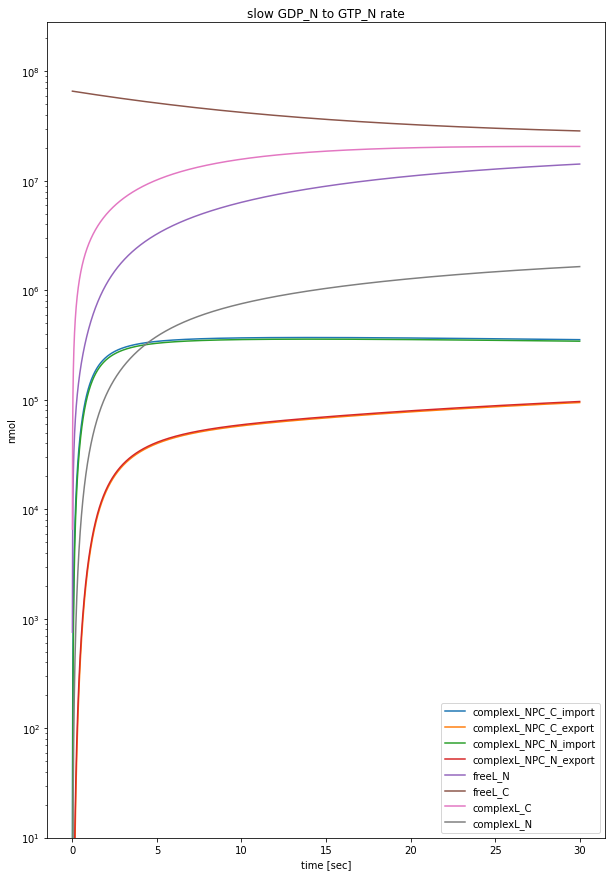

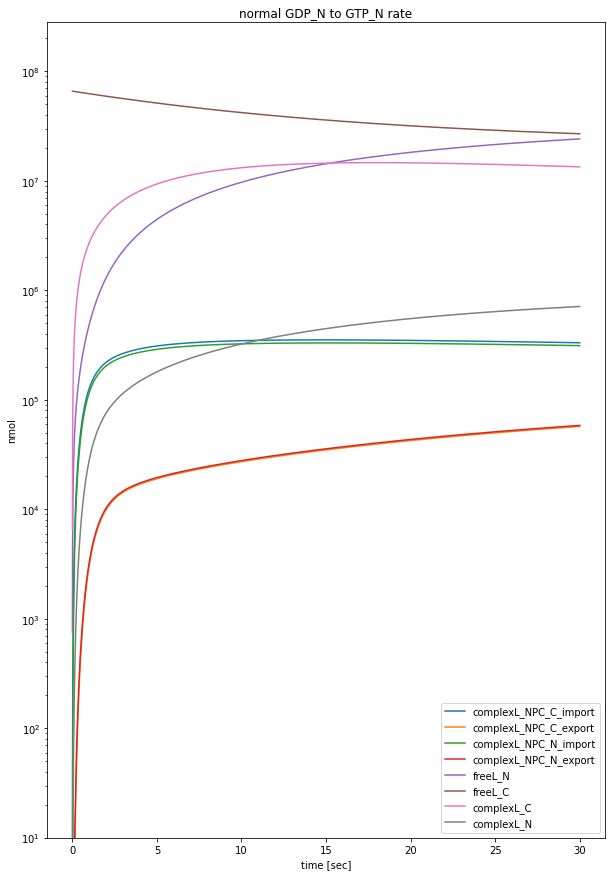

In [210]:
ts_slow=  get_ts_time_series(2e-3, 
                            rate_GDP_N_to_GTP_N_per_sec=0.2)
#fig, ax = plt.subplots(1, 3,figsize=(40,5))
stats_slow= ts_slow.simulate(sim_time_sec)
ax = plot_simulation_attributes(stats_slow, 
                                           [cargoL_attributes], 
                                           log= is_log)
plt.title("slow GDP_N to GTP_N rate")
ts_normal=  get_ts_time_series(2e-3)
stats_normal= ts_normal.simulate(sim_time_sec)
ax = plot_simulation_attributes(stats_normal,
                                           [cargoL_attributes], 
                                           log= is_log)
plt.title("normal GDP_N to GTP_N rate")

## Map parameters phasespace of transport

In [ ]:
import map_param_grid
importlib.reload(map_param_grid)

### Run:

In [ ]:
def get_param_range_D_kon(nx, ny):
    param_range= {}
    print(f"nx={nx} ny={ny}")
    epsilon = 1e-9
    v_N_L= 627e-15
    param_range['tag_x']= "max_passive_diffusion_rate_nmol_per_sec_per_M"
    param_range['range_x']= np.logspace(-4, 0, nx) * transport_simulation.N_A * v_N_L # divided to convert from nuclear passive diffudsion rate r, where dN/dt = r*([C]-[N]))
    param_range['pretty_x']= r"passive diffusion rate [$s^{-1} M^{-1}$]"
    param_range['tag_y']= "rate_free_to_complex_per_sec"
    param_range['range_y']= np.logspace(-4, 0, ny)
    param_range['pretty_y']= r"NTR $k_{on}$ [$sec^{-1}$]"
    return param_range
print("hi")

In [25]:
import multiprocessing

def get_transport_simulation_map_passive(**kwargs):
    ts= transport_simulation.TransportSimulation(**kwargs) 
    ts.set_time_step(1e-3)
    ts.set_v_N_L(627e-15, True)
    ts.set_v_C_L(2194e-15, True)
    ts.set_NPC_dock_sites(n_NPCs= 2000, 
                        n_dock_sites_per_NPC= 500)
    ts.fraction_complex_NPC_to_free_N_per_M_GTP_per_sec = 0.5e+6 # TODO: this is doubled relative to complex_N to free_N
    ts.fraction_complex_N_to_free_N_per_M_GTP_per_sec = 0.5e+6
    return ts

n_processors= multiprocessing.cpu_count()
param_range= get_param_range_D_kon(nx= 9, ny= 9)
stats_grids_passive, ts_passive= map_param_grid.map_param_grid_parallel( param_range,
                                      equilibration_time_sec= 600.0,
                                      n_processors= n_processors-2,
                                    transport_simulation_generator= get_transport_simulation_map_passive)


NameError: name 'get_param_range_D_kon' is not defined

In [ ]:
param_range2= param_range.copy()
param_range2['pretty_x'] = r"dN/dt passive rate [$s^{-1}$]"
param_range2['range_x'] = param_range['range_x'] / transport_simulation.N_A / ts_passive.get_v_N_L()
fig, axes= plt.subplots(2,3, figsize=(14, 6.5), sharex=True, sharey=True)
NC_min=1.0
NC_max= 8.0
# N/C
plt.sca(axes[0,0])
map_param_grid.plot_NC_ratios(param_range2, stats_grids_passive, ts_passive,
                             vmin= NC_min, vmax= NC_max)
# Bound fraction
map_param_grid.plot_bound_fraction(param_range2, stats_grids_passive, 
                                   'N', ax=axes[0,1])
map_param_grid.plot_bound_fraction(param_range2, stats_grids_passive, 
                                   'C', ax=axes[0,2])
# Import/export
map_param_grid.plot_import_export(param_range2,
                                  stats_grids_passive,
                                  axes=[axes[1,0], axes[1,1]])
plt.sca(axes[1,2])
ratios_import_export= map_param_grid.get_import_export_ratios(stats_grids_passive)
map_param_grid.plot_param_grid(param_range2, 
                ratios_import_export,
                Z_label= 'import:export',
                vmin= NC_min, vmax= NC_max, 
                levels=np.linspace(NC_min, NC_max, 21),
                extend= 'both')
print(param_range)
print(param_range2)


## map traverse

In [1]:
import map_param_grid
import transport_simulation
import importlib
import numpy as np
import multiprocessing
importlib.reload(map_param_grid)
importlib.reload(transport_simulation)

Registering <function TransportSimulation.get_free_N_to_free_C at 0x7fd880484f28>
Registering <function TransportSimulation.get_nmol_GDP_C_to_GDP_N at 0x7fd880484d08>
Registering <function TransportSimulation.get_nmol_GDP_N_to_GTP_N at 0x7fd880484b70>
Registering <function TransportSimulation.get_nmol_GTP_C_to_GDP_C at 0x7fd880484bf8>
Registering <function TransportSimulation.get_nmol_GTP_N_to_GTP_C at 0x7fd880484c80>
Registering <function TransportSimulation.get_nmol_cargo_bleached at 0x7fd8804871e0>
Registering <function TransportSimulation.get_nmol_complex_C_to_free_C at 0x7fd880484d90>
Registering <function TransportSimulation.get_nmol_complex_NPC_to_complex_N_C at 0x7fd880487158>
Registering <function TransportSimulation.get_nmol_complex_NPC_to_free_N at 0x7fd880484a60>
Registering <function TransportSimulation.get_nmol_complex_NPC_traverse at 0x7fd8804870d0>
Registering <function TransportSimulation.get_nmol_complex_N_C_to_complex_NPC at 0x7fd880487048>
Registering <function Tran

<module 'transport_simulation' from '/Volumes/GoogleDrive/My Drive/Projects/PereIon_NPC_FLIP/git_npctransport_kinetic/transport_simulation.py'>

In [2]:
def get_param_range_traverse_kon(nx, ny):
    param_range= {}
    print(f"nx={nx} ny={ny}")
    param_range['tag_x']= "fraction_complex_NPC_traverse_per_sec"
    param_range['range_x']= np.logspace(-1, 4, nx) 
    param_range['pretty_x']= r"rate NPC traverse [$sec^{-1}$]"
    param_range['tag_y']= "rate_free_to_complex_per_sec"
    param_range['range_y']= np.logspace(-3, 2, ny)
    param_range['pretty_y']= r"NTR $k_{on}$ [$sec^{-1}$]"
    return param_range

In [3]:
def get_transport_simulation_by_passive(passive_nuclear_molar_rate_per_sec,
                                        is_force,
                                        **kwargs):    
    if is_force:
        v_N_L=762e-15
        v_C_L=4768e-15
    else:
        v_N_L=627e-15
        v_C_L=2194e-15    
    ts= transport_simulation.TransportSimulation(v_N_L= v_N_L,
                                                v_C_L= v_C_L)
    ts.set_time_step(0.2e-3)
    ts.set_NPC_dock_sites(n_NPCs= 2000, 
                        n_dock_sites_per_NPC= 500)
    ts.set_passive_nuclear_molar_rate_per_sec(passive_nuclear_molar_rate_per_sec) #get_passive_export_rate_per_sec(27,1))
    ts.fraction_complex_NPC_to_free_N_per_M_GTP_per_sec = 1.0e+6 # TODO: this is doubled relative to complex_N to free_N
    ts.fraction_complex_N_to_free_N_per_M_GTP_per_sec = 1.0e+6
    ts.rate_complex_to_NPC_per_free_site_per_sec_per_M= 50e+6
    ts.fraction_complex_NPC_to_complex_N_C_per_sec= 1000.0 # Leakage parameter
    ts.rate_GDP_N_to_GTP_N_per_sec= 1000.0
    ts.rate_GTP_N_to_GDP_N_per_sec= 0.2
    ts.rate_GTP_C_to_GDP_C_per_sec= 500.0
    ts.rate_GTP_N_to_GTP_C_per_sec = 0.5
    ts.rate_GDP_C_to_GDP_N_per_sec = 1.0
    ts.rate_GDP_N_to_GDP_C_per_sec = 1.0 
    ts.rate_complex_to_free_per_sec = 0.05
    ts.rate_free_to_complex_per_sec = 0.01 # SCAN
    ts.fraction_complex_NPC_traverse_per_sec=4000 # SCAN
    ts.set_params(**kwargs) # override defaults
    return ts
test_ts= get_transport_simulation_by_passive(0.02, False)
print(test_ts.max_passive_diffusion_rate_nmol_per_sec_per_M)

7551588000.0


In [4]:
import map_param_grid
importlib.reload(map_param_grid)
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('image', cmap='RdYlBu')

def plot_stats_grids(stats_grids, transport_simulation,
                        NC_min=0.0,
                        NC_max= 10.0,
                        vmax_import_export=10.0):
    fig, axes= plt.subplots(3,3, figsize=(14, 10), sharex=True, sharey=True)
    # N/C
    plt.sca(axes[0,0])
    map_param_grid.plot_NC_ratios(param_range, 
                                  stats_grids, 
                                  transport_simulation, 
                                  vmin= NC_min,
                                  vmax= NC_max,
                                  levels= np.linspace(NC_min, NC_max, 21)
#                                  levels= np.logspace(np.log10(NC_min),np.log10(NC_max),11),
#                                  locator= mpl.ticker.LogLocator(base=1.05)
                                 )
    # Bound fraction
    map_param_grid.plot_bound_fraction(param_range, stats_grids, 
                                       'N', ax=axes[0,1])
    map_param_grid.plot_bound_fraction(param_range, stats_grids, 
                                       'C', ax=axes[0,2])
    # Import/export
    import_export_locator= mpl.ticker.LogLocator(subs=[1.0, 5.0])
    map_param_grid.plot_import_export(param_range,
                                      stats_grids,
                                      axes= [axes[1,0], axes[1,1]],
                                   vmin= 0.01,
                                   vmax= vmax_import_export,
#                    levels=np.linspace(0.0,vmax_import_export,20),
                    levels= np.logspace(np.log10(1e-2),np.log10(vmax_import_export),21),
                                      locator= import_export_locator, 
                                     extend='both')
    plt.sca(axes[1,2])
    ratios_import_export= map_param_grid.get_import_export_ratios(stats_grids)
    map_param_grid.plot_param_grid(param_range, 
                    ratios_import_export,
                    Z_label= 'import:export',
                    vmin= NC_min,
                    vmax= NC_max,
                    levels=np.linspace(NC_min, NC_max, 21),
                    extend='both')
    
    plt.sca(axes[2,0])
    GTP_ratio= stats_grids['GTP_N']/stats_grids['GTP_C']
    map_param_grid.plot_param_grid(param_range, 
                    GTP_ratio,
                    Z_label= f"GTP N:C",
                    vmin=0.0, 
                     vmax=2000.0, 
                     levels=np.linspace(0,2000,21), 
                     extend='both')
    plt.sca(axes[2,1])
    GDP_ratio= stats_grids['GDP_C']/stats_grids['GDP_N']
    map_param_grid.plot_param_grid(param_range, 
                    GDP_ratio,
                    Z_label= f"GDP C:N",
                    vmin=0.0, 
#                     vmax=vmax, 
#                     levels=np.linspace(0,vmax,11), 
                     extend='both')
    plt.sca(axes[2,2])
    Ran_ratio= (stats_grids['GTP_N']+stats_grids['GDP_N'])/(stats_grids['GTP_C']+stats_grids['GDP_C'])
    map_param_grid.plot_param_grid(param_range, 
                    Ran_ratio,
                    Z_label= f"Ran N:C",
                    vmin=0.0, 
                     vmax=20, 
                    levels=np.linspace(0,20,21), 
                     extend='both')
    plt.show()

nx=7 ny=7
{'tag_x': 'fraction_complex_NPC_traverse_per_sec', 'range_x': array([1.00000000e-01, 6.81292069e-01, 4.64158883e+00, 3.16227766e+01,
       2.15443469e+02, 1.46779927e+03, 1.00000000e+04]), 'pretty_x': 'rate NPC traverse [$sec^{-1}$]', 'tag_y': 'rate_free_to_complex_per_sec', 'range_y': array([1.00000000e-03, 6.81292069e-03, 4.64158883e-02, 3.16227766e-01,
       2.15443469e+00, 1.46779927e+01, 1.00000000e+02]), 'pretty_y': 'NTR $k_{on}$ [$sec^{-1}$]'}
Param fraction_complex_NPC_traverse_per_sec default value is 4000
Param rate_free_to_complex_per_sec default value is 0.01
njobs=49
Finished some ten jobs (at i=3 j=0 r=0.03993552884147977)
Finished some ten jobs (at i=2 j=4 r=0.08425363950190201)
Finished some ten jobs (at i=4 j=3 r=0.059640196196994455)
Finished some ten jobs (at i=1 j=6 r=0.06000298979253327)
passive rate 0.01 is force False
0.0 10.0


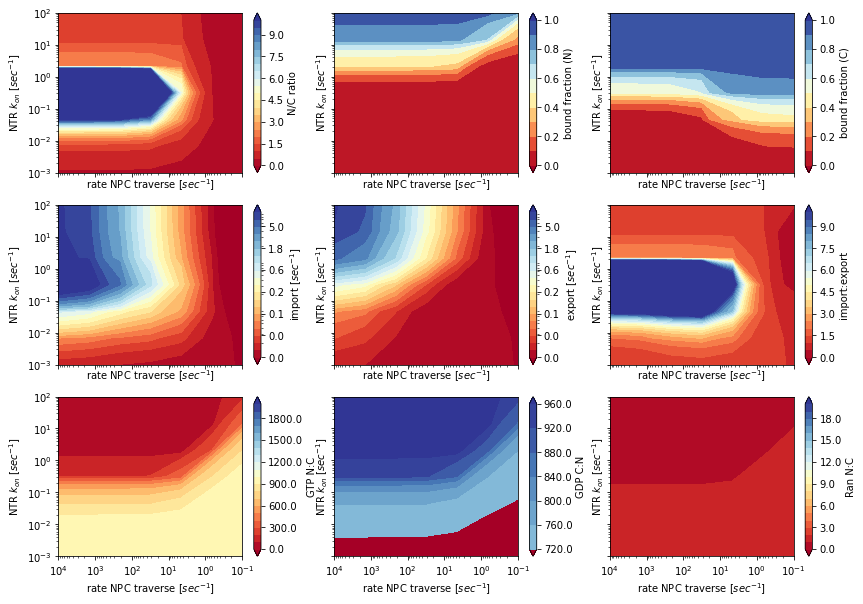

Param fraction_complex_NPC_traverse_per_sec default value is 4000
Param rate_free_to_complex_per_sec default value is 0.01
njobs=49
Finished some ten jobs (at i=6 j=0 r=0.06215104865357146)
Finished some ten jobs (at i=2 j=0 r=0.08473803008618108)
Finished some ten jobs (at i=2 j=1 r=0.0936787691279688)
Finished some ten jobs (at i=3 j=4 r=0.0811627620890093)
Finished some ten jobs (at i=0 j=6 r=0.09727021866163321)
Finished some ten jobs (at i=2 j=5 r=0.02865452591074058)
passive rate 0.01 is force True
0.0 10.0


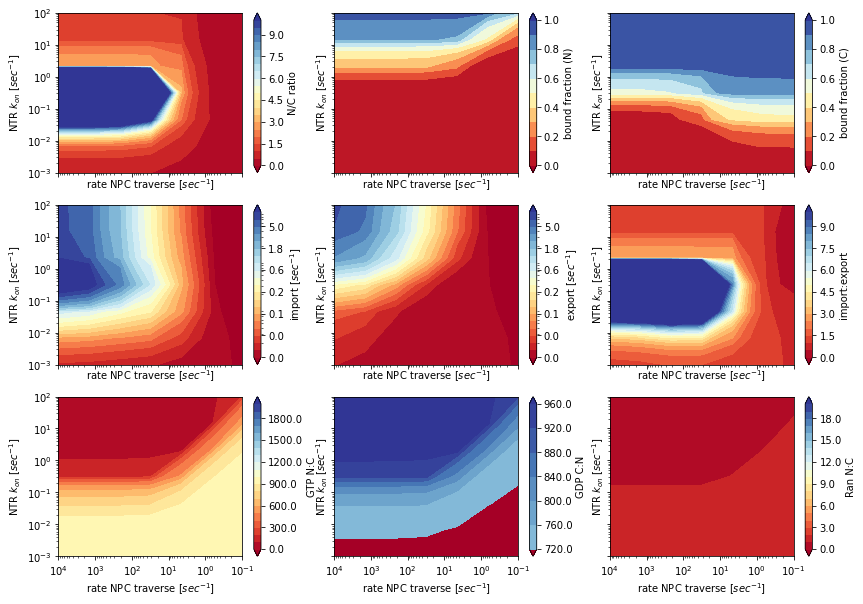

Param fraction_complex_NPC_traverse_per_sec default value is 4000
Param rate_free_to_complex_per_sec default value is 0.01
njobs=49
Finished some ten jobs (at i=1 j=1 r=0.02135147047092356)
Finished some ten jobs (at i=2 j=0 r=0.03758037146195903)
Finished some ten jobs (at i=5 j=1 r=0.019908652333655685)
Finished some ten jobs (at i=0 j=4 r=0.001243816433508682)
Finished some ten jobs (at i=2 j=4 r=0.08018824826777704)
Finished some ten jobs (at i=3 j=5 r=0.010793182959196845)
Finished some ten jobs (at i=6 j=5 r=0.06023806674334342)
passive rate 0.013130324344878838 is force False
0.0 10.0


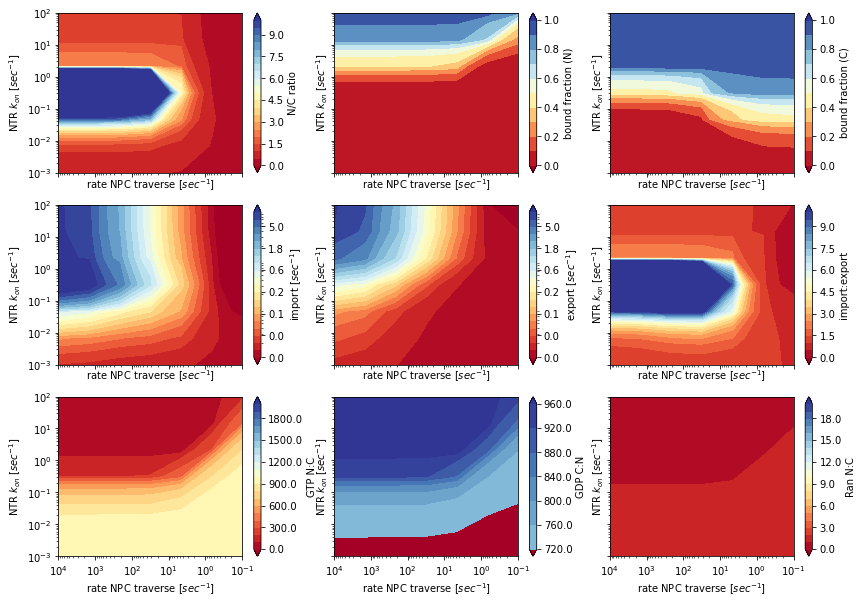

Param fraction_complex_NPC_traverse_per_sec default value is 4000
Param rate_free_to_complex_per_sec default value is 0.01
njobs=49
Finished some ten jobs (at i=6 j=1 r=0.09866423372517108)
Finished some ten jobs (at i=2 j=1 r=0.04948508865220669)
passive rate 0.013130324344878838 is force True
0.0 10.0


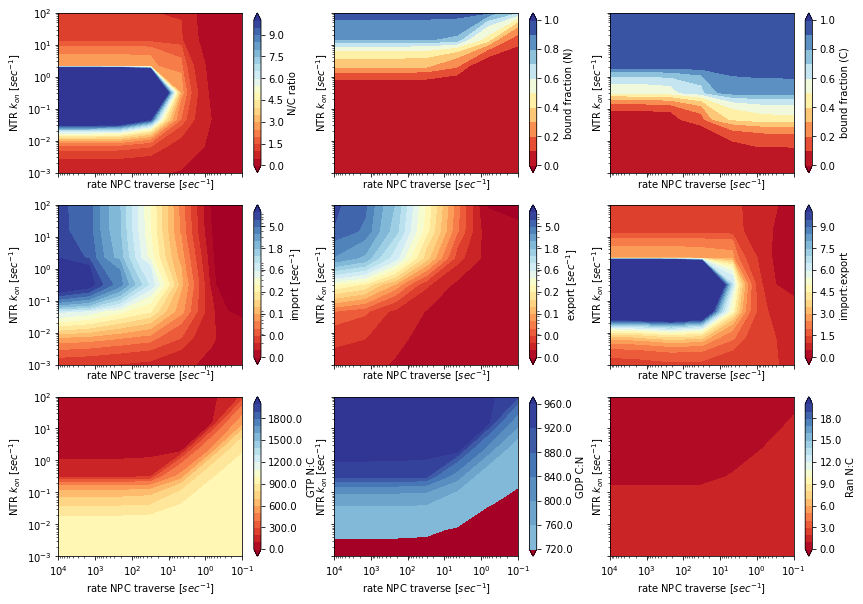

Param fraction_complex_NPC_traverse_per_sec default value is 4000
Param rate_free_to_complex_per_sec default value is 0.01
njobs=49
Finished some ten jobs (at i=1 j=2 r=0.08446182107976474)
Finished some ten jobs (at i=6 j=2 r=0.07430615247483374)
Finished some ten jobs (at i=0 j=4 r=0.06957235176882315)
Finished some ten jobs (at i=2 j=4 r=0.016872525935900162)
Finished some ten jobs (at i=0 j=3 r=0.07751887333123075)
Finished some ten jobs (at i=3 j=4 r=0.0182802645211404)
Finished some ten jobs (at i=0 j=5 r=0.09113975693040921)
Finished some ten jobs (at i=6 j=5 r=0.06330910630612463)
passive rate 0.017240541740171793 is force False
0.0 10.0


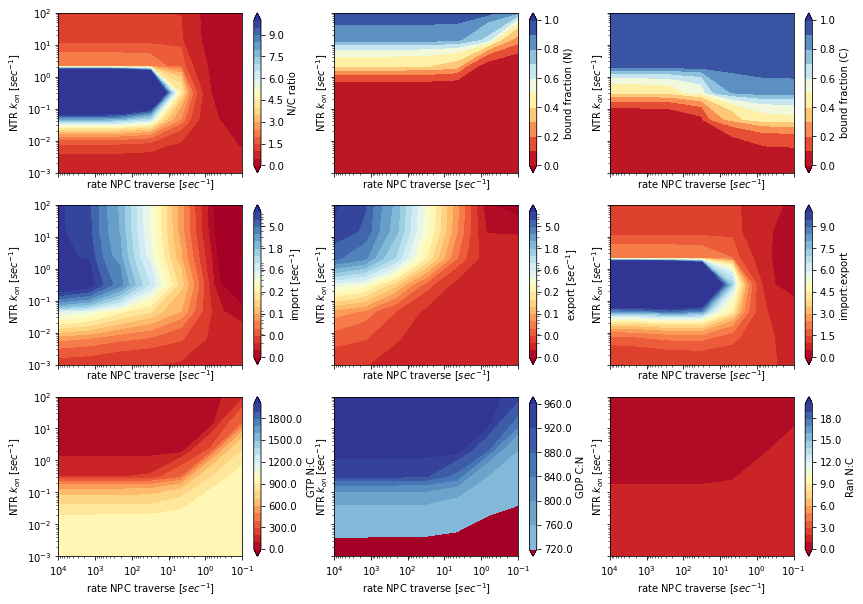

Param fraction_complex_NPC_traverse_per_sec default value is 4000
Param rate_free_to_complex_per_sec default value is 0.01
njobs=49
Finished some ten jobs (at i=0 j=0 r=0.03500728059178415)
Finished some ten jobs (at i=2 j=0 r=0.041808130179319614)
Finished some ten jobs (at i=1 j=3 r=0.057851128035522725)
Finished some ten jobs (at i=0 j=4 r=0.03872295296623296)
Finished some ten jobs (at i=3 j=5 r=0.043666355546783)
Finished some ten jobs (at i=5 j=5 r=0.008203979365567049)
Finished some ten jobs (at i=6 j=6 r=0.008934478126342293)
Finished some ten jobs (at i=1 j=6 r=0.04268967888755437)
passive rate 0.017240541740171793 is force True
0.0 10.0


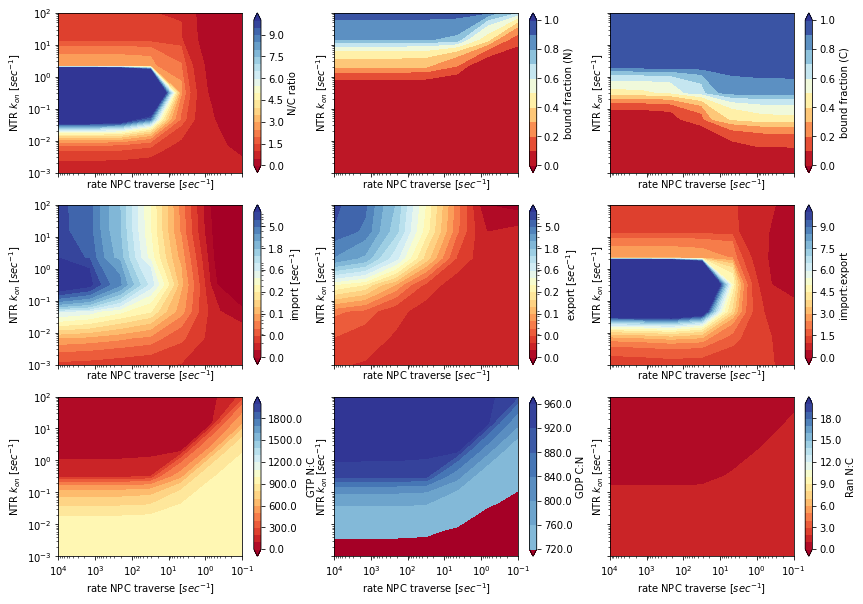

Param fraction_complex_NPC_traverse_per_sec default value is 4000
Param rate_free_to_complex_per_sec default value is 0.01
njobs=49
Finished some ten jobs (at i=0 j=2 r=0.08534059855183507)
Finished some ten jobs (at i=4 j=1 r=0.09079661992029664)
Finished some ten jobs (at i=1 j=2 r=0.019118940635700743)
Finished some ten jobs (at i=1 j=4 r=0.04386402790109756)
passive rate 0.022637390492987748 is force False
0.0 10.0


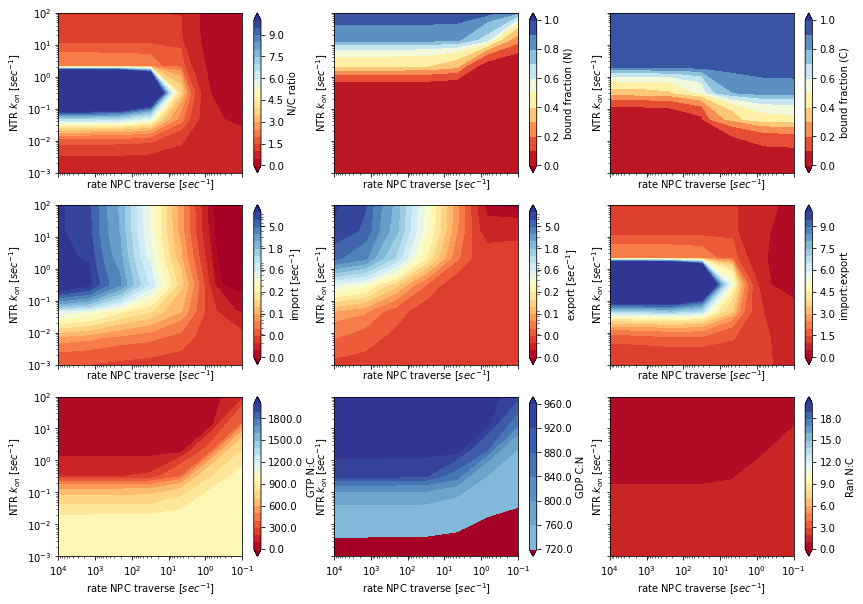

Param fraction_complex_NPC_traverse_per_sec default value is 4000
Param rate_free_to_complex_per_sec default value is 0.01
njobs=49
Finished some ten jobs (at i=4 j=0 r=0.08721993152605578)
Finished some ten jobs (at i=3 j=4 r=0.06337705325881193)
Finished some ten jobs (at i=6 j=6 r=0.07329268462309269)
passive rate 0.022637390492987748 is force True
0.0 10.0


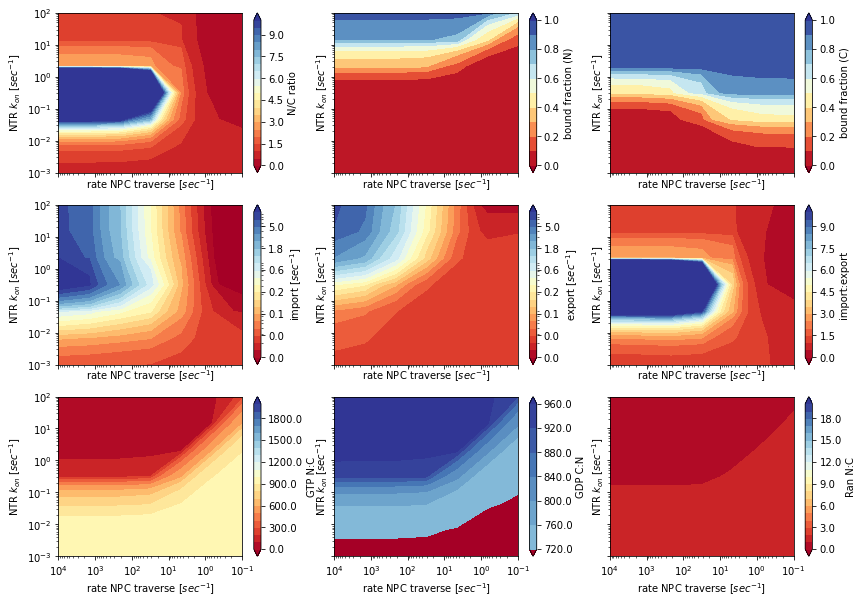

Param fraction_complex_NPC_traverse_per_sec default value is 4000
Param rate_free_to_complex_per_sec default value is 0.01
njobs=49
Finished some ten jobs (at i=2 j=1 r=0.0007535697041459732)
Finished some ten jobs (at i=6 j=2 r=0.03887195843124058)
Finished some ten jobs (at i=4 j=2 r=0.07881600513858367)
Finished some ten jobs (at i=5 j=2 r=0.057477059556567345)
passive rate 0.02972362794946059 is force False
0.0 10.0


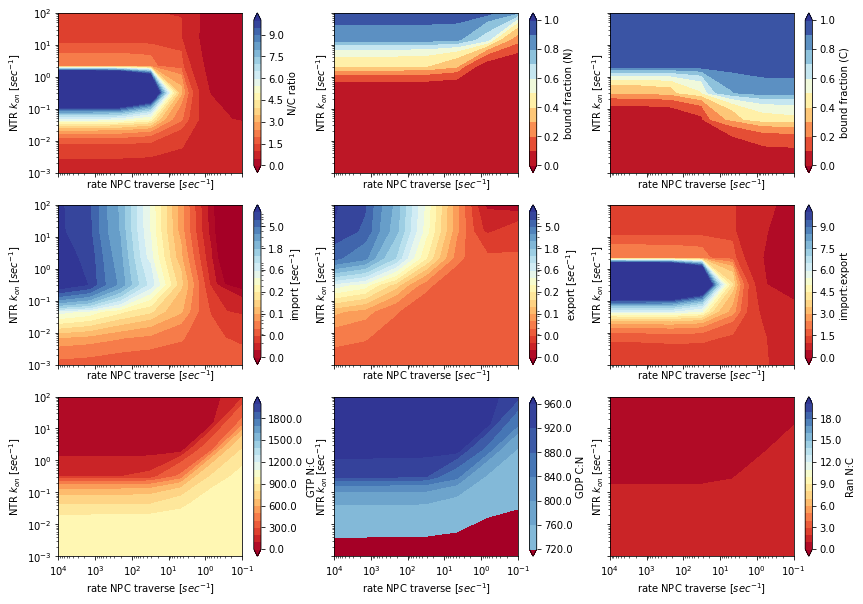

Param fraction_complex_NPC_traverse_per_sec default value is 4000
Param rate_free_to_complex_per_sec default value is 0.01
njobs=49
Finished some ten jobs (at i=2 j=2 r=0.05100413524320424)
Finished some ten jobs (at i=4 j=0 r=0.015447068916813467)
Finished some ten jobs (at i=4 j=2 r=0.0825915357270568)
Finished some ten jobs (at i=6 j=2 r=0.09771464994455781)
Finished some ten jobs (at i=2 j=4 r=0.009347662264886147)
Finished some ten jobs (at i=4 j=5 r=0.06773231947542313)
passive rate 0.02972362794946059 is force True
0.0 10.0


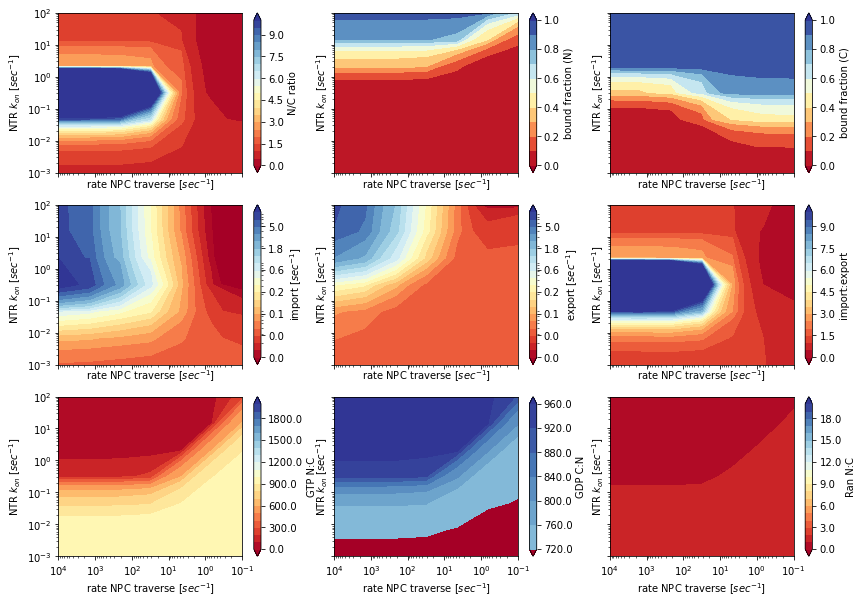

Param fraction_complex_NPC_traverse_per_sec default value is 4000
Param rate_free_to_complex_per_sec default value is 0.01
njobs=49
Finished some ten jobs (at i=5 j=0 r=0.048498802744497915)
Finished some ten jobs (at i=0 j=1 r=0.06832454624879114)
Finished some ten jobs (at i=0 j=4 r=0.06144606793985097)
Finished some ten jobs (at i=5 j=3 r=0.02219499008403336)
Finished some ten jobs (at i=6 j=4 r=0.08491636786669554)
Finished some ten jobs (at i=5 j=2 r=0.0695933650765106)
passive rate 0.03902808756829234 is force False
0.0 10.0


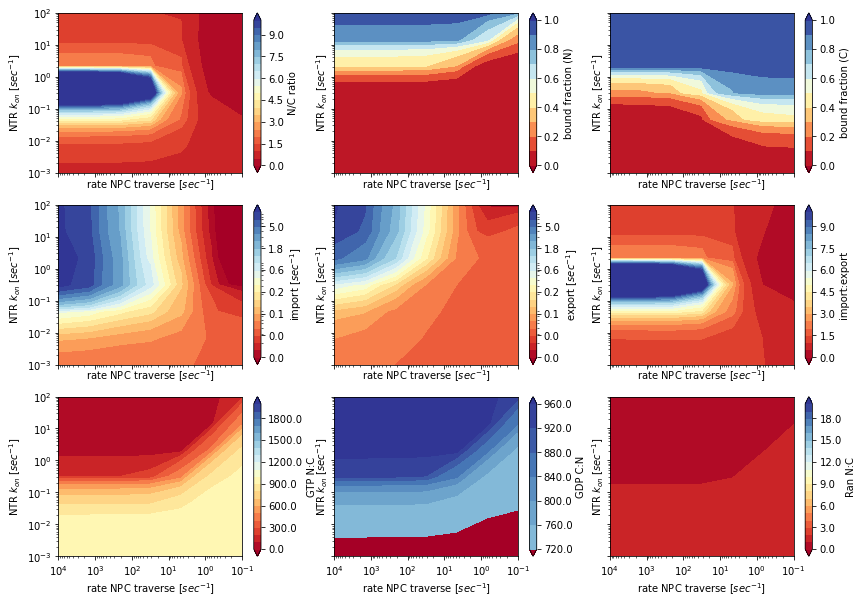

Param fraction_complex_NPC_traverse_per_sec default value is 4000
Param rate_free_to_complex_per_sec default value is 0.01
njobs=49
Finished some ten jobs (at i=4 j=0 r=0.007683536511361222)
Finished some ten jobs (at i=3 j=1 r=0.07239129040818126)
Finished some ten jobs (at i=2 j=1 r=0.07726911333606012)
Finished some ten jobs (at i=5 j=3 r=0.09101281700250907)
passive rate 0.03902808756829234 is force True
0.0 10.0


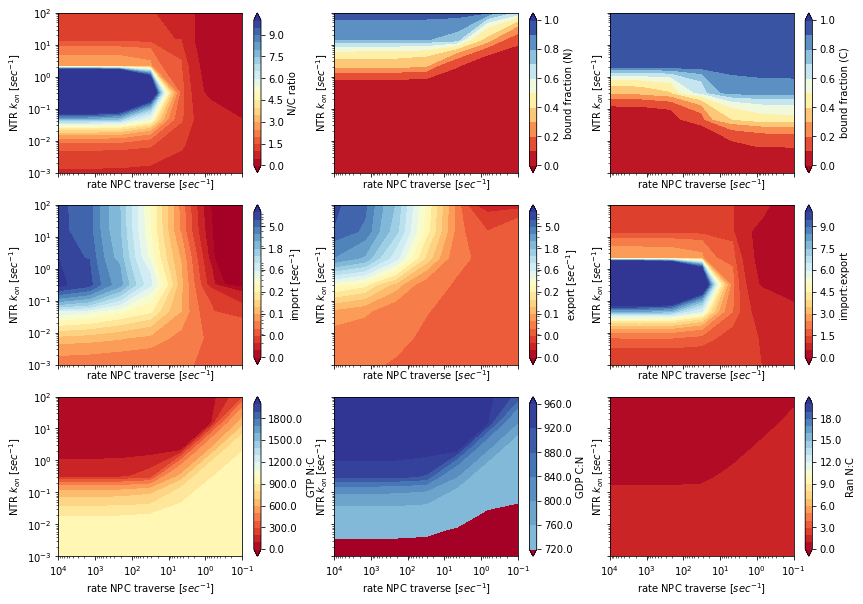

Param fraction_complex_NPC_traverse_per_sec default value is 4000
Param rate_free_to_complex_per_sec default value is 0.01
njobs=49
Finished some ten jobs (at i=0 j=0 r=0.0892881524093071)
Finished some ten jobs (at i=5 j=1 r=0.06383927611216933)
Finished some ten jobs (at i=4 j=2 r=0.05865479444691801)
Finished some ten jobs (at i=4 j=4 r=0.08021448767437822)
Finished some ten jobs (at i=5 j=5 r=0.07588638599140773)
Finished some ten jobs (at i=6 j=5 r=0.07539257858988457)
passive rate 0.0512451448332012 is force False
0.0 10.0


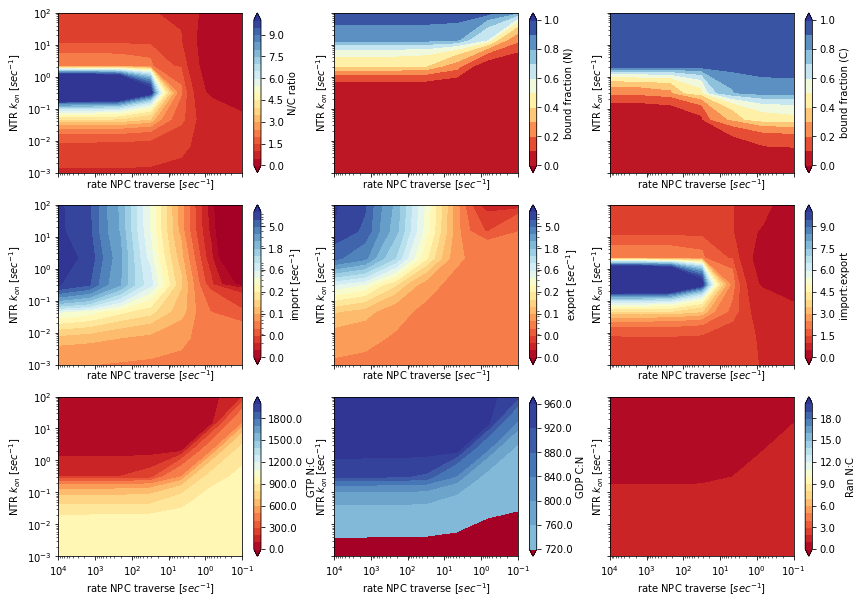

Param fraction_complex_NPC_traverse_per_sec default value is 4000
Param rate_free_to_complex_per_sec default value is 0.01
njobs=49
Finished some ten jobs (at i=6 j=0 r=0.05122297091465189)
Finished some ten jobs (at i=0 j=1 r=0.037233216981045425)
Finished some ten jobs (at i=5 j=6 r=0.05676086694769411)
passive rate 0.0512451448332012 is force True
0.0 10.0


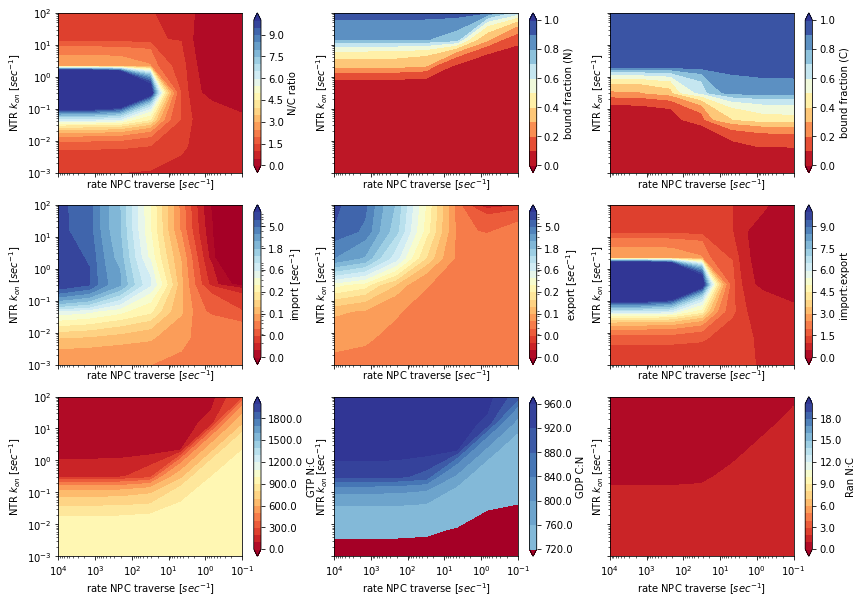

Param fraction_complex_NPC_traverse_per_sec default value is 4000
Param rate_free_to_complex_per_sec default value is 0.01
njobs=49
Finished some ten jobs (at i=3 j=0 r=0.09023651445236314)
Finished some ten jobs (at i=1 j=3 r=0.0878574227389084)
Finished some ten jobs (at i=3 j=4 r=0.0807620781560292)
Finished some ten jobs (at i=6 j=6 r=0.07581355469574658)
Finished some ten jobs (at i=4 j=5 r=0.09277212237817678)
Finished some ten jobs (at i=2 j=5 r=0.08780269393113149)
passive rate 0.06728653727602237 is force False
0.0 10.0


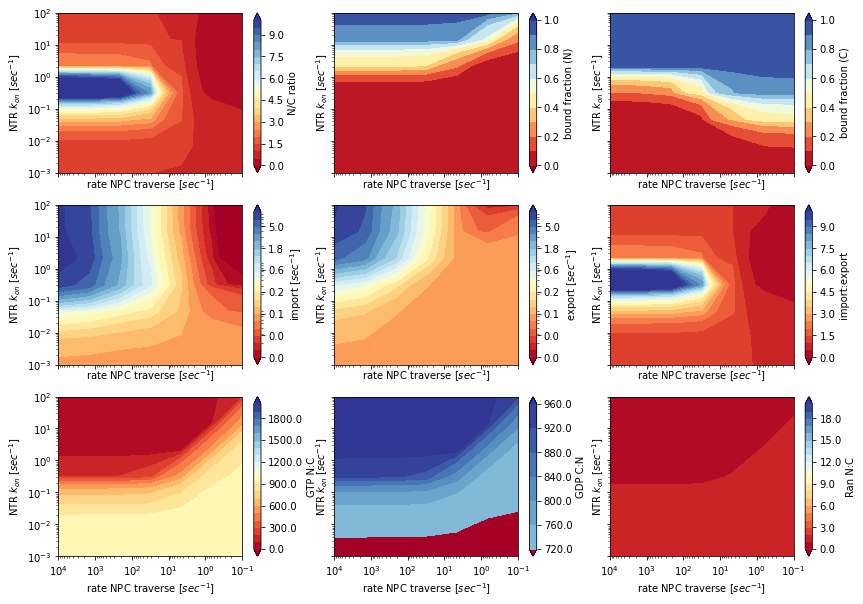

Param fraction_complex_NPC_traverse_per_sec default value is 4000
Param rate_free_to_complex_per_sec default value is 0.01
njobs=49
Finished some ten jobs (at i=4 j=4 r=0.07709111675674973)
Finished some ten jobs (at i=0 j=3 r=0.05000254400119353)
Finished some ten jobs (at i=5 j=2 r=0.09452747200540923)
Finished some ten jobs (at i=6 j=3 r=0.008755091310748697)
Finished some ten jobs (at i=5 j=5 r=0.08167970041369721)
passive rate 0.06728653727602237 is force True
0.0 10.0


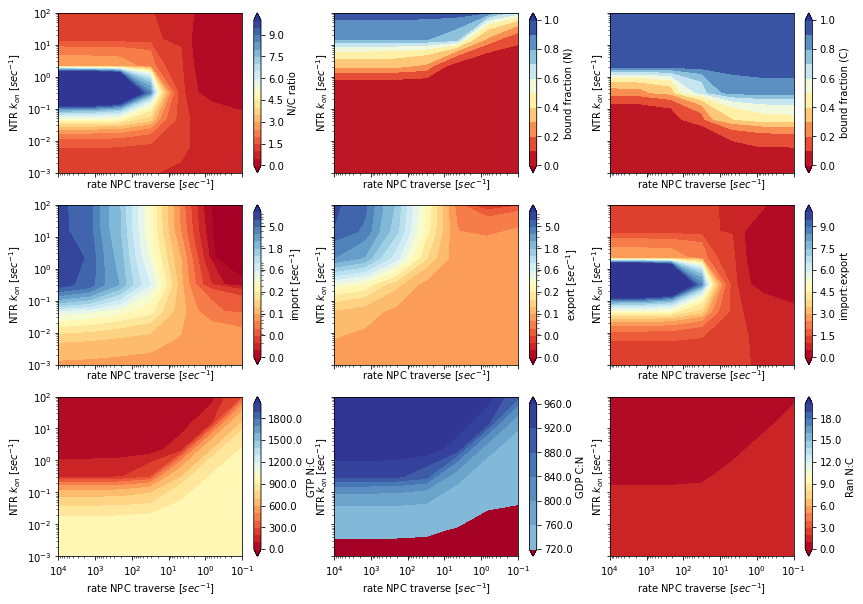

Param fraction_complex_NPC_traverse_per_sec default value is 4000
Param rate_free_to_complex_per_sec default value is 0.01
njobs=49
Finished some ten jobs (at i=1 j=2 r=0.04720401935678564)
Finished some ten jobs (at i=3 j=3 r=0.08490699959757086)
Finished some ten jobs (at i=2 j=3 r=0.07695613287596115)
Finished some ten jobs (at i=4 j=5 r=0.032222088887880806)
Finished some ten jobs (at i=5 j=6 r=0.008467224497568648)
passive rate 0.08834940584779542 is force False
0.0 10.0


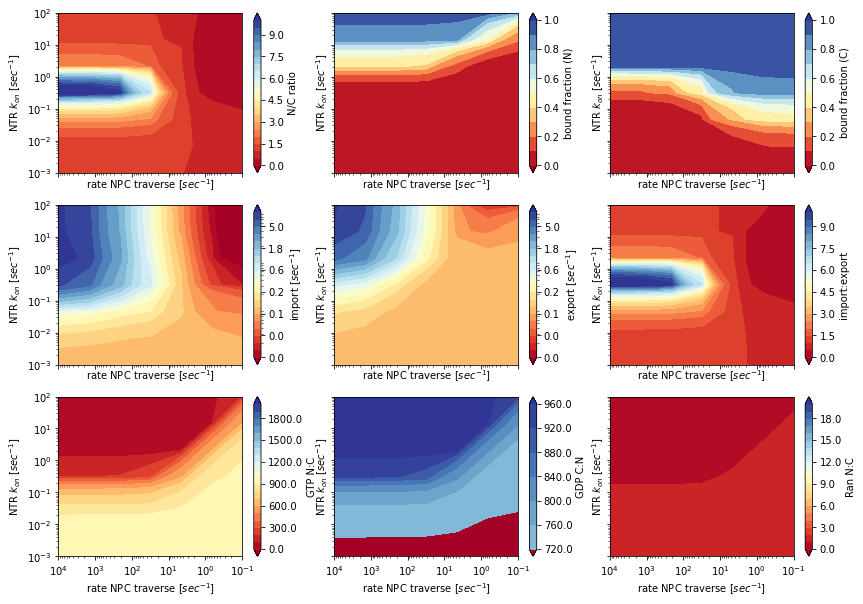

Param fraction_complex_NPC_traverse_per_sec default value is 4000
Param rate_free_to_complex_per_sec default value is 0.01
njobs=49
Finished some ten jobs (at i=1 j=1 r=0.008403722204641029)
Finished some ten jobs (at i=6 j=0 r=0.06715730814710608)
Finished some ten jobs (at i=3 j=1 r=0.09263483527643113)
Finished some ten jobs (at i=1 j=0 r=0.06511832861318367)
Finished some ten jobs (at i=3 j=3 r=0.027971668839088304)
Finished some ten jobs (at i=6 j=6 r=0.028007645112942514)
passive rate 0.08834940584779542 is force True
0.0 10.0


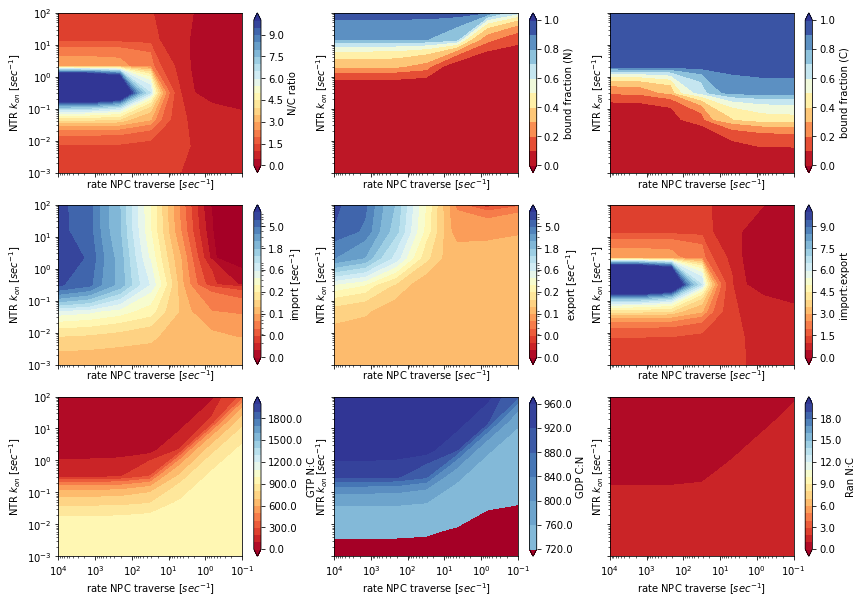

Param fraction_complex_NPC_traverse_per_sec default value is 4000
Param rate_free_to_complex_per_sec default value is 0.01
njobs=49
Finished some ten jobs (at i=2 j=0 r=0.06553244358105337)
Finished some ten jobs (at i=2 j=1 r=0.049209404994792205)
Finished some ten jobs (at i=3 j=2 r=0.02349207760506622)
Finished some ten jobs (at i=6 j=1 r=0.061431375511717956)
Finished some ten jobs (at i=6 j=5 r=0.015038604631309571)
passive rate 0.1160056354458889 is force False
0.0 10.0


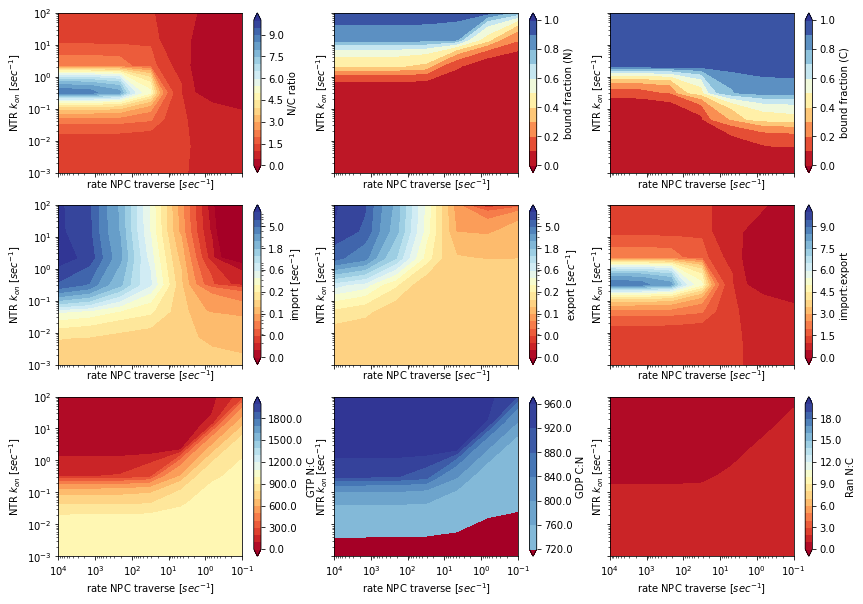

Param fraction_complex_NPC_traverse_per_sec default value is 4000
Param rate_free_to_complex_per_sec default value is 0.01
njobs=49
Finished some ten jobs (at i=6 j=0 r=0.061105272394996524)
Finished some ten jobs (at i=1 j=1 r=0.09007350600271191)
Finished some ten jobs (at i=5 j=0 r=0.007463190623633209)
Finished some ten jobs (at i=4 j=3 r=0.056728348555753705)
Finished some ten jobs (at i=6 j=5 r=0.048290372651401126)
passive rate 0.1160056354458889 is force True
0.0 10.0


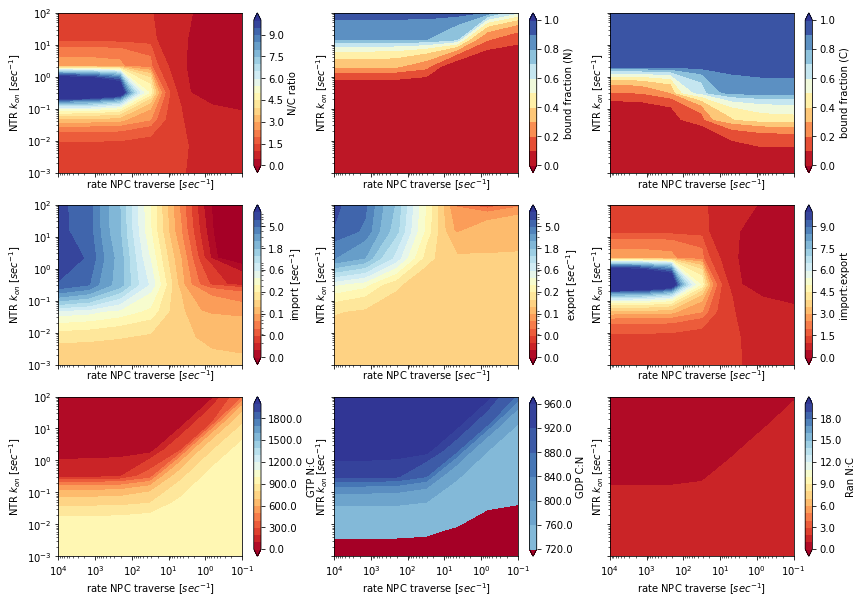

Param fraction_complex_NPC_traverse_per_sec default value is 4000
Param rate_free_to_complex_per_sec default value is 0.01
njobs=49
Finished some ten jobs (at i=5 j=1 r=0.027062193812150137)
Finished some ten jobs (at i=6 j=3 r=0.0268015111227351)
Finished some ten jobs (at i=6 j=5 r=0.018359001600264047)
passive rate 0.15231916192382952 is force False
0.0 10.0


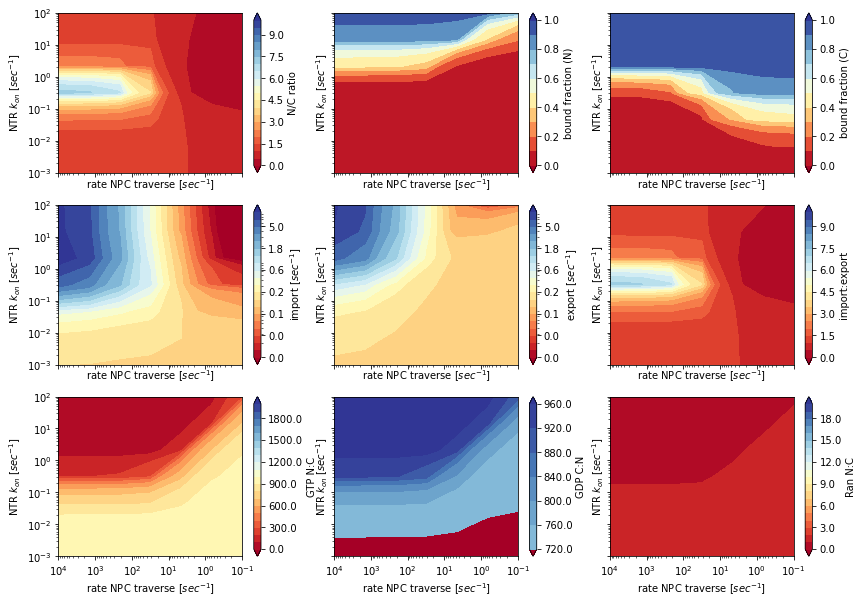

Param fraction_complex_NPC_traverse_per_sec default value is 4000
Param rate_free_to_complex_per_sec default value is 0.01
njobs=49
Finished some ten jobs (at i=6 j=3 r=0.01660618145530357)
Finished some ten jobs (at i=3 j=5 r=0.03998319289119712)
passive rate 0.15231916192382952 is force True
0.0 10.0


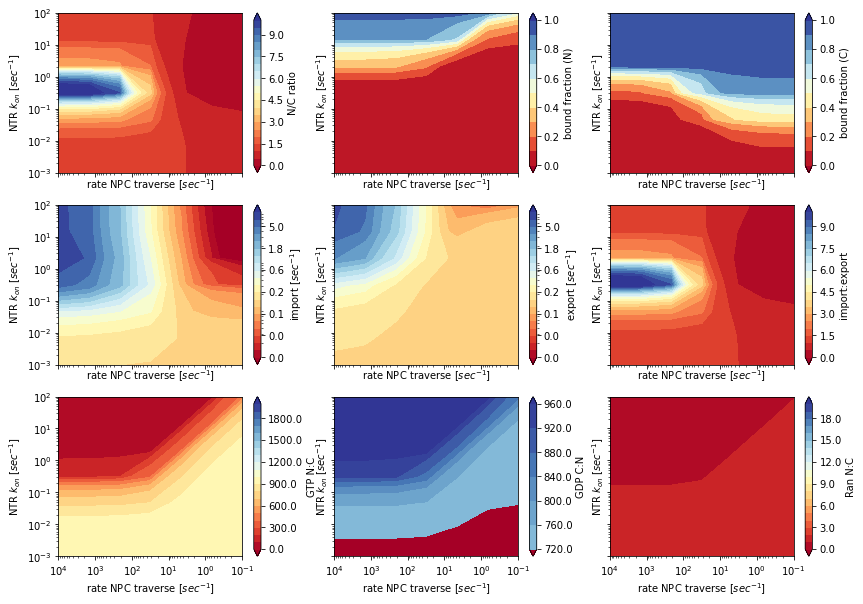

Param fraction_complex_NPC_traverse_per_sec default value is 4000
Param rate_free_to_complex_per_sec default value is 0.01
njobs=49
Finished some ten jobs (at i=2 j=4 r=0.0037937706773011337)
Finished some ten jobs (at i=5 j=3 r=0.009395276538879505)
Finished some ten jobs (at i=0 j=3 r=0.08869989252652277)
Finished some ten jobs (at i=4 j=6 r=0.07225583772823818)
passive rate 0.20000000000000004 is force False
0.0 10.0


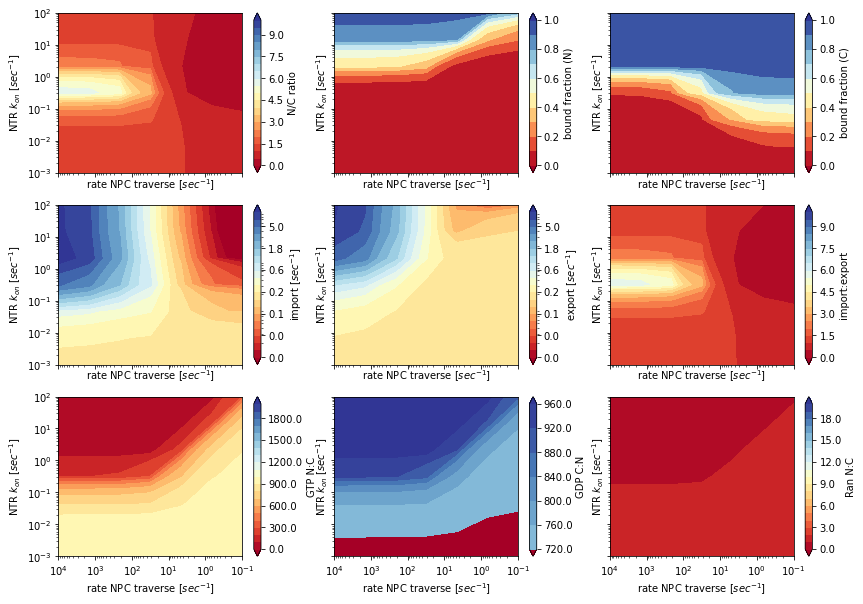

Param fraction_complex_NPC_traverse_per_sec default value is 4000
Param rate_free_to_complex_per_sec default value is 0.01
njobs=49
Finished some ten jobs (at i=0 j=0 r=0.05811839492619364)
Finished some ten jobs (at i=5 j=0 r=0.019603219337220645)
Finished some ten jobs (at i=2 j=3 r=0.019978225422379925)
passive rate 0.20000000000000004 is force True
0.0 10.0


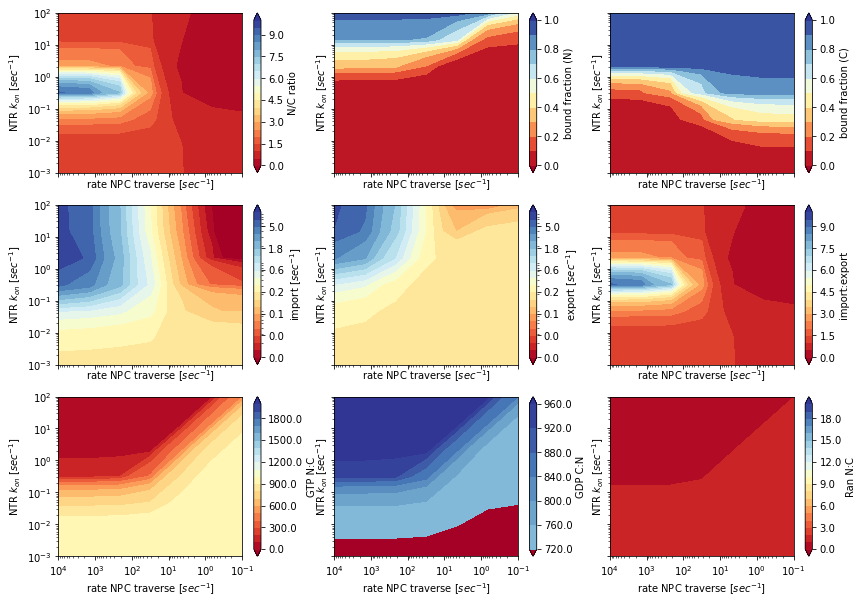

In [5]:
param_range= get_param_range_traverse_kon(nx= 7, ny= 7)
print(param_range)
n_processors= multiprocessing.cpu_count()
if True:
    stats_grids_traverse_by_passive_force= {}
    ts_traverse_by_passive_force= {}
for passive in np.logspace(np.log10(0.01), np.log10(0.2), 12): #0.01,0.09,6):
    for is_force in [False, True]:
#        if is_force:
#            continue
        def transport_simulation_generator(**kwargs):
            return get_transport_simulation_by_passive(passive_nuclear_molar_rate_per_sec= passive, 
                                                       is_force= is_force,
                                                       **kwargs)
        key= (passive, is_force)
        stats_grids_traverse_by_passive_force[key], \
        ts_traverse_by_passive_force[key] = \
            map_param_grid.map_param_grid_parallel( param_range,
                                                equilibration_time_sec= 40.0,
                                                n_processors= n_processors-3,
                                        transport_simulation_generator= transport_simulation_generator)
        print(f"passive rate {passive} is force {is_force}")
        plot_stats_grids(stats_grids_traverse_by_passive_force[key],
                    ts_traverse_by_passive_force[key])

In [ ]:
keys= sorted(stats_grids_traverse_by_passive_force.keys(), key=lambda x: (x[0],x[1]))
for key in keys:
#    if key[1]:
#        continue
    print(f"passive rate {key[0]} is force {key[1]}")
    plot_stats_grids(stats_grids_traverse_by_passive_force[key],
                    ts_traverse_by_passive_force[key],
                    vmax_import_export= 10.0)

passive rate 0.01 is force False
0.0 10.0


In [7]:
print("hi")

hi


# Map NLS strength, MW size, force

In [ ]:
import importlib
import transport_simulation
from transport_simulation import TransportSimulation
importlib.reload(transport_simulation)
import transport_simulation
from transport_simulation import TransportSimulation

import numpy as np
import transport_simulation

def get_ts_with_parameters(MW= 27, 
                      NLS_strength= 0, 
                      is_force= False, 
                      **kwargs):
    ts = TransportSimulation(**kwargs)
    ts.set_v_N_L(627e-15, True)
    ts.set_v_C_L(2194e-15, True)
    if is_force and False:
        ts.set_v_N_L(762e-15, False)
        ts.set_v_C_L(4768e-15, False)
    ts.set_NPC_dock_sites(n_NPCs= 2000, 
                        n_dock_sites_per_NPC= 500)
    ts.set_passive_nuclear_molar_rate_per_sec(
        get_passive_nuclear_molar_rate_per_sec(MW, is_force))
    ts.set_params(rate_free_to_complex_per_sec= 
                  get_free_to_complex_rate(NLS_strength))
    ts.set_params(fraction_complex_NPC_traverse_per_sec=
                  get_fraction_complex_NPC_traverse_per_sec(MW, is_force))
    ts.fraction_complex_NPC_to_free_N_per_M_GTP_per_sec = 0.5e+6 # TODO: this is doubled relative to complex_N to free_N
    ts.fraction_complex_N_to_free_N_per_M_GTP_per_sec = 0.5e+6
    ##
    ts.rate_complex_to_NPC_per_free_site_per_sec_per_M= 0.5e+6
    ts.fraction_complex_NPC_to_complex_N_C_per_sec= 100.0 # Leakage parameter
    return ts

def get_free_to_complex_rate(NLS_strength):
    rates = [0.0,
             0.001,
             0.00316,
             0.01,
             0.02, #2.11
             0.045, #2.11
             0.1,  #16.4
             0.2,
             0.45,
             1.0,
             2.0,
             4.5
            ]
    return rates[NLS_strength]

def get_passive_nuclear_molar_rate_per_sec(MW, is_force): # TODO: verify it corresponds to multiplyng by concentration rather than nmolecules
    #TODO: generalize this - either from the literature or regression
    base_rates={ 27:0.07624291, 
                41:0.0560286, 
                54:0.03452787, 
                67:0.03022162 }
    rate= base_rates[MW]
    if is_force:
        rate += get_force_effect_on_diffusion(MW)
    return rate

def get_force_effect_on_diffusion(MW):
    """
    The effect of force on passive diffusion as measured by experiment
    """
    effects = {27:0.08698999,
               41:0.03395035,
               54:-0.00019152,
               67:0.00177338}
    return effects[MW]

def get_fraction_complex_NPC_traverse_per_sec(MW, is_force):
    s= 10.0
    rate= { 27: [s*2.0,  s*5.0],
            41: [s*2.0,  s*5.5],
            54: [s*1.5, s*4.5],
            67: [s*2.0,  s*4.0] }
    i_force= 1 if is_force else 0
    return rate[MW][i_force]


In [ ]:
def get_compartment_nmol_stats(ts, 
                               stats, 
                               compartment,
                              labels= ['L', 'U']):
    assert(compartment in ['N','C', 'NPC'])
    nframes= len(stats['time_sec'])
    nmol_stats= np.zeros(nframes)
    if compartment=='NPC':
        for label in labels:
            for side in ['N', 'C']:
                for source in ['import', 'export']:
                    tag= 'complex{}_NPC_{}_{}'.format(label,
                                                     side,
                                                     source)
                    nmol_stats = nmol_stats + stats[tag]
    else:
        for state in ['free','complex']:
            for label in labels:
                tag= '{}{}_{}'.format(state, 
                                      label, 
                                      compartment)
                nmol_stats = nmol_stats + stats[tag]
    return nmol_stats

def get_compartment_concentration_stats(ts, 
                                        stats, 
                                        compartment, 
                                       labels= ['L', 'U']):
    assert(compartment in ['N','C'])
    nmol_stats= get_compartment_nmol_stats(ts, 
                                           stats, 
                                           compartment,
                                           labels)
    is_nuclear= (compartment=='N')
    volume_L= (ts.get_v_N_L() if is_nuclear else ts.get_v_C_L())
    return (nmol_stats/transport_simulation.N_A)/volume_L

def get_N_C_ratio_stats(ts, 
                        stats,
                        labels= ['L','U']):
    EPSILON= 1E-12
    c_N_stats= get_compartment_concentration_stats(ts, 
                                                   stats, 
                                                   'N')
    c_C_stats= get_compartment_concentration_stats(ts, 
                                                   stats, 
                                                   'C')
    return c_N_stats/c_C_stats

In [ ]:
import matplotlib.pyplot as plt
import multiprocessing

n_processors= 5

def do_simulate(ts, simulation_time_sec):
    return ts.simulate(simulation_time_sec)

def get_MW_stats_list_by_force(MW, simulation_time_sec):
    assert(MW in [27,41, 54, 67])
    stats_list_by_force= {}
    TSs_by_force= {}
    for is_force in [False, True]:
        TS_tuples= []
        for i_NLS in range(9):
            ts = get_ts_with_parameters(MW= MW,
                                    NLS_strength=i_NLS,
                                  is_force= is_force)
            ts.set_params(dt_sec=1.0e-3)
            TS_tuples.append((ts, simulation_time_sec))
        pool= multiprocessing.Pool(processes= n_processors)
        stats_list_by_force[is_force]= pool.starmap(do_simulate,
                                                    TS_tuples)
        TSs_by_force[is_force]= [x[0] for x in TS_tuples]
        print(f"Is force {is_force} i_NLS {i_NLS}: OK")
    return (stats_list_by_force, TSs_by_force)



In [ ]:
##### TIME CONSUMING #####$
simulation_time_sec= 60
MW_to_stats_list_by_force= {}            
for MW in [27, 41, 54, 67]:
    print(MW)
    MW_to_stats_list_by_force[MW]= get_MW_stats_list_by_force(MW, simulation_time_sec)
  

In [ ]:

def plot_MW_stats_list(stats_list_by_force, TSs_by_force):
    plot_from_sec=  0.1 # ts.bleach_start_time_sec + 1.0
    extras= [#'GTP_N',
            #'GDP_N',
            #'GTP_C',
            #'GDP_C',
            #'complexL_C',
            #'freeL_C',
            #'complexL_N',
            #'freeL_N'
    ]
    fig, ax_grid= plt.subplots(7+len(extras), 3, 
                               figsize=(15,
                                        40.0 + 5.0*len(extras)), 
                               sharex= False, sharey=False)
    n_NLS= len(stats_list_by_force[False])
    assert(n_NLS == len(stats_list_by_force[True]))
    ratios= np.ones(shape=(7+len(extras), n_NLS))
    ax_grid= ax_grid.transpose()
    for axes, is_force in zip(ax_grid[0:2,:], [False, True]):  
        for i_NLS, stats in enumerate(stats_list_by_force[is_force]):
            ts= TSs_by_force[is_force][i_NLS]
            labels= ['L', 'U']
            x= stats['time_sec']
            ys={}
            ys[0]= stats['nuclear_importL_per_sec'] + stats['nuclear_importU_per_sec']
            ys[1]= stats['nuclear_exportL_per_sec'] + stats['nuclear_exportU_per_sec']
            ys[2]= get_N_C_ratio_stats(ts,
                                       stats, 
                                       labels)
            ys[3]= get_compartment_concentration_stats(ts, 
                                                      stats, 
                                                      'C', 
                                                      labels)
            ys[4]= get_compartment_concentration_stats(ts, 
                                                      stats, 
                                                      'N', 
                                                      labels)
            ys[5]= ys[3] - ys[4]
            ys[6]= stats['complexL_NPC_N_import']+stats['complexL_NPC_C_import']+stats['complexL_NPC_N_export']+stats['complexL_NPC_C_export'] \
                + stats['complexU_NPC_C_import']+stats['complexU_NPC_C_import']+stats['complexU_NPC_N_export']+stats['complexU_NPC_C_export'] 
            for iextra, extra in enumerate(extras):
                ys[7+iextra]= stats[extra]
            plot_from_frame= int(plot_from_sec/ts.dt_sec) 
            for i_row, ax in enumerate(axes):
                ax.plot(x[plot_from_frame:], 
                        ys[i_row][plot_from_frame:],
                        label= get_free_to_complex_rate(i_NLS))  
                ax.set_xlabel(r"time [$sec$]")           
                if is_force:
                   ratios[i_row, i_NLS] *= ys[i_row][-1]
                else:
                   ratios[i_row, i_NLS] /= ys[i_row][-1]
            axes[0].set_ylabel(r"import rate [$sec^{-1}$]")
            axes[0].set_ylim([0.01,0.3])
            #axes[0].set_yscale('log')
            axes[1].set_ylabel(r"export rate [$sec^{-1}$]")
            axes[1].set_ylim([0.01,0.3])
            #axes[1].set_yscale('log')
            axes[2].set_ylabel("N/C ratio")
            axes[2].set_ylim([0,7.0])
            axes[3].set_ylabel(r"C [$M$]")
            axes[3].set_yscale('log')
            axes[4].set_ylabel(r"N [$M$]")
            axes[4].set_yscale('log')
            axes[5].set_ylabel(r"$\Delta$(C,N) [$M$]")
            axes[5].set_yscale('symlog', linthreshy=1e-9)
            axes[6].set_ylabel('NPC [nmol]')
            for iextra, extra in enumerate(extras):
                axes[7+iextra].set_ylabel(extra)
                axes[7+iextra].set_yscale('log')
            title= "30 kPa" if is_force else "5 kPa"
            axes[0].set_title(title)
            
    NLSs= [get_free_to_complex_rate(i_NLS) for i_NLS in range(ratios.shape[1])]
    ax_grid[2,0].set_title("Mechanosensitivity")
    for i_row, ax in enumerate(ax_grid[2,:]):
       ax.bar(range(len(NLSs)),
              ratios[i_row,:],
               width=0.8,
             tick_label= NLSs)
       ax.set_xlabel('NLS strength')
            
    handles, labels = ax_grid[0,0].get_legend_handles_labels()
    lh= fig.legend(handles, labels, loc='center left')
    lh.set_title('NLS strength')

        
for MW in [27, 41, 54, 67]:
    print(MW)
    plot_MW_stats_list(*MW_to_stats_list_by_force[MW])
    plt.show()